# Step0. Loading library 

In [2]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 29.7 MB/s eta 0:00:00


In [4]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=9c905f6095c0e5d66a975c105761db2ee4d0aff782743dec2280ad3327460ccb
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=1176470a92471c780bc04fc94b88fea9626a5c4604aaa6d071c30c17e9289aa2
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [5]:
!pip install Afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 KB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=900ca3512692755d8f432f962de931480abd9cb6a6b2ea097a6ed4e3d5c298c1
  Stored in directory: /root/.cache/pip/wheels/f6/6f/c3/b305c5107a17618f2938a067d5ffcbb556909d82398762089e
Successfully built Afinn


In [6]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 45.8 MB/s eta 0:00:00


In [7]:
import pandas as pd
import datetime
import time
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from konlpy.tag import Kkma
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
import pyLDAvis
import pyLDAvis.gensim_models
from gensim import corpora, models
import gensim
from gensim.models import CoherenceModel
from gensim import corpora, models
from collections import Counter 

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping
/usr/local/lib/python3.8/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [8]:
import glob
# from afinn import Afinn
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [10]:
pd.set_option('mode.chained_assignment',  None)

# Step1. Loading Data 

In [11]:
nbs = pd.read_excel('/content/drive/MyDrive/NbS/2.전체 데이터.xlsx')   # 제공해준 원본 데이터 
nbs

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,Document Type,Publication Stage,Open Access,Source,EID,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,"Jouin C., Mlocek Z.",57219668257;57219668269;,Evolutions of nature based solutions for storm...,2020,Techniques - Sciences - Methodes,115,3,NaN,61.0,70.0,...,Article,Final,NaN,Scopus,2-s2.0-85094632803,NaN,NaN,NaN,NaN,NaN
1,Buzási A.,56692966000;,Climate vulnerability and adaptation challenge...,2021,Climate,9,2,25,1.0,17.0,...,Article,Final,NaN,Scopus,2-s2.0-85100598191,NaN,NaN,NaN,NaN,NaN
2,"Yu G.-R., Yang M., Chen Z., Zhang L.-M.",55807480400;55703268000;57001631400;55077923500;,Technical approach and strategic plan for larg...,2021,Chinese Journal of Applied Ecology,32,4,NaN,1141.0,1153.0,...,Article,Final,NaN,Scopus,2-s2.0-85104538541,NaN,NaN,NaN,NaN,NaN
3,"Thorn J.P.R., Biancardi Aleu R., Wijesinghe A....",56613034600;57260808600;57226747891;5726048210...,Mainstreaming nature-based solutions for clima...,2021,Landscape and Urban Planning,216,NaN,104235,NaN,NaN,...,Article,Final,NaN,Scopus,2-s2.0-85115004828,NaN,NaN,NaN,NaN,NaN
4,"Schuerch M., Spencer T., Temmerman S., Kirwan ...",54783506900;55156903100;6602902860;10044268300...,Future response of global coastal wetlands to ...,2018,Nature,561,7722,NaN,231.0,234.0,...,Article,Final,NaN,Scopus,2-s2.0-85053248555,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,Antoušková M.,42161107100;,Economic value of recreation - Determinants in...,2012,Agris On-line Papers in Economics and Informatics,4,SUPPL.SPL. 4,NaN,3.0,9.0,...,Article,Final,NaN,Scopus,2-s2.0-84874044123,NaN,NaN,NaN,NaN,NaN
1052,Nicol R.,55173678200;,Entering the Fray: The role of outdoor educati...,2014,Educational Philosophy and Theory,46,5,NaN,449.0,461.0,...,Article,Final,NaN,Scopus,2-s2.0-84899996845,NaN,NaN,NaN,NaN,NaN
1053,"Boller F., Hunziker M., Conedera M., Elsasser ...",36647235100;6701797579;6603211787;7005909792;8...,Fascinating remoteness: The dilemma of hiking ...,2010,Mountain Research and Development,30,4,NaN,320.0,331.0,...,Article,Final,NaN,Scopus,2-s2.0-78649521966,NaN,NaN,NaN,NaN,NaN
1054,"Vedel S.E., Thorsen B.J., Jacobsen J.B.",15057304900;6701749452;35773326500;,"First-movers, non-movers, and social gains fro...",2009,Ecological Economics,68,2021-08-09 00:00:00,NaN,2363.0,2371.0,...,Article,Final,NaN,Scopus,2-s2.0-65649085241,NaN,NaN,NaN,NaN,NaN


In [12]:
df = nbs[['Title','Year','Abstract','Index Keywords']]  # 필요한 변수만 추출 
df.head()

,Title,Year,Abstract,Index Keywords
0,Evolutions of nature based solutions for storm...,2020,Stormwater management is one of the greatest c...,cost-benefit analysis; maintenance; project as...
1,Climate vulnerability and adaptation challenge...,2021,Wine producers face several challenges regardi...,NaN
2,Technical approach and strategic plan for larg...,2021,Terrestrial ecosystems are the core components...,ecological approach; environmental issue; envi...
3,Mainstreaming nature-based solutions for clima...,2021,(Despite a growing recognition of the importan...,climate change; infrastructure planning; natur...
4,Future response of global coastal wetlands to ...,2018,The response of coastal wetlands to sea-level ...,coastal waters; letter; occupation; sea level ...


In [13]:
uniqueyears, time_slices = np.unique(df.Year, return_counts=True)
print(uniqueyears, time_slices)

[2003 2006 2007 2009 2010 2012 2014 2015 2016 2017 2018 2019 2020 2021
 2022] [  1   1   1   1   1   2   5   7  20  51  73 123 263 485  22]


In [14]:
# 2016년 이후 논문만 추출 
df = df[(df['Year'] >= 2016) & (df['Year'] <= 2022)]
uniqueyears, time_slices = np.unique(df.Year, return_counts=True)
print(uniqueyears, time_slices)

[2016 2017 2018 2019 2020 2021 2022] [ 20  51  73 123 263 485  22]


In [15]:
sum(time_slices)  # 논문 총 개수

1037

In [16]:
df = df.reset_index(drop = True)   # 인덱스 재조정 
df.head()

,Title,Year,Abstract,Index Keywords
0,Evolutions of nature based solutions for storm...,2020,Stormwater management is one of the greatest c...,cost-benefit analysis; maintenance; project as...
1,Climate vulnerability and adaptation challenge...,2021,Wine producers face several challenges regardi...,NaN
2,Technical approach and strategic plan for larg...,2021,Terrestrial ecosystems are the core components...,ecological approach; environmental issue; envi...
3,Mainstreaming nature-based solutions for clima...,2021,(Despite a growing recognition of the importan...,climate change; infrastructure planning; natur...
4,Future response of global coastal wetlands to ...,2018,The response of coastal wetlands to sea-level ...,coastal waters; letter; occupation; sea level ...


In [17]:
# Index Keywords NaN을 '' 로 대체 
df['Index Keywords'] = df['Index Keywords'].replace({np.nan: ''})

In [18]:
 df['Abs_Key'] = None

 for i in range(len(df)):
     df['Abs_Key'][i] = df['Abstract'][i] + df['Index Keywords'][i]     # 인덱스 키워드랑 초록 합치기 

In [19]:
df.head()

,Title,Year,Abstract,Index Keywords,Abs_Key
0,Evolutions of nature based solutions for storm...,2020,Stormwater management is one of the greatest c...,cost-benefit analysis; maintenance; project as...,Stormwater management is one of the greatest c...
1,Climate vulnerability and adaptation challenge...,2021,Wine producers face several challenges regardi...,,Wine producers face several challenges regardi...
2,Technical approach and strategic plan for larg...,2021,Terrestrial ecosystems are the core components...,ecological approach; environmental issue; envi...,Terrestrial ecosystems are the core components...
3,Mainstreaming nature-based solutions for clima...,2021,(Despite a growing recognition of the importan...,climate change; infrastructure planning; natur...,(Despite a growing recognition of the importan...
4,Future response of global coastal wetlands to ...,2018,The response of coastal wetlands to sea-level ...,coastal waters; letter; occupation; sea level ...,The response of coastal wetlands to sea-level ...


# Step2-1. Data Cleaning
- 한글, 숫자, 특수문자 모두 제거  
- 고유명사, 문장 시작을 대문자인 영어의 특성을 고려해 모두 소문자로 변경  

In [20]:
# # 영문자 이외 문자(한글, 숫자, 특수문자)는 공백으로 변환
df['Abs_Key'] = df['Abs_Key'].str.replace('[^a-zA-Z]',' ',regex=True)

# 고유명사, 첫시작 대문자를 고려하여 모두 소문자로 변경 
df['Abs_Key'] = df['Abs_Key'].str.lower()
df.head()

,Title,Year,Abstract,Index Keywords,Abs_Key
0,Evolutions of nature based solutions for storm...,2020,Stormwater management is one of the greatest c...,cost-benefit analysis; maintenance; project as...,stormwater management is one of the greatest c...
1,Climate vulnerability and adaptation challenge...,2021,Wine producers face several challenges regardi...,,wine producers face several challenges regardi...
2,Technical approach and strategic plan for larg...,2021,Terrestrial ecosystems are the core components...,ecological approach; environmental issue; envi...,terrestrial ecosystems are the core components...
3,Mainstreaming nature-based solutions for clima...,2021,(Despite a growing recognition of the importan...,climate change; infrastructure planning; natur...,despite a growing recognition of the importan...
4,Future response of global coastal wetlands to ...,2018,The response of coastal wetlands to sea-level ...,coastal waters; letter; occupation; sea level ...,the response of coastal wetlands to sea level ...


In [21]:
df = df[['Title','Year','Abs_Key']]
df.head()

,Title,Year,Abs_Key
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...


# Step2-2. Word tokenization & Extract noun & Lemmatization
- 토큰화 
- 각 토큰마다 품사 태깅 후, 명사만 설정해서 추출  
- 원형 찾아서 통일 => ex. change,changes => change 
- 한글자 제거  

표제어 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']  
표제어 추출 후 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']

표제어 추출은 뒤에서 언급할 어간 추출과는 달리 단어의 형태가 적절히 보존되는 양상을 보이는 특징이 있습니다. 하지만 그럼에도 위의 결과에서는 dy나 ha와 같이 의미를 알 수 없는 적절하지 못한 단어를 출력하고 있습니다. 이는 표제어 추출기(lemmatizer)가 본래 단어의 품사 정보를 알아야만 정확한 결과를 얻을 수 있기 때문입니다.  

WordNetLemmatizer는 입력으로 단어가 동사 품사라는 사실을 알려줄 수 있습니다. 즉, dies와 watched, has가 문장에서 동사로 쓰였다는 것을 알려준다면 표제어 추출기는 품사의 정보를 보존하면서 정확한 Lemma를 출력하게 됩니다.



In [22]:
import nltk
import pickle
from nltk.corpus import stopwords
import re
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [23]:
df['Abs_Key_token'] = None

for i in range(len(df)):
    df['Abs_Key_token'][i] = nltk.word_tokenize(df['Abs_Key'][i])   # Word Tokenization
    df['Abs_Key_token'][i] = nltk.pos_tag(df['Abs_Key_token'][i])   # POS tagging (품사정보 결합)

df.head()

,Title,Year,Abs_Key,Abs_Key_token
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...,"[(stormwater, NN), (management, NN), (is, VBZ)..."
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...,"[(wine, NN), (producers, NNS), (face, VBP), (s..."
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...,"[(terrestrial, JJ), (ecosystems, NNS), (are, V..."
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...,"[(despite, IN), (a, DT), (growing, VBG), (reco..."
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...,"[(the, DT), (response, NN), (of, IN), (coastal..."


In [24]:
def get_wordnet_pos(pos_tag):  # https://ysyblog.tistory.com/88
    if pos_tag.startswith('V'):
        return 'v'
    elif pos_tag.startswith('N'):
        return 'n'
    elif pos_tag.startswith('J'):
        return 'a'
    elif pos_tag.startswith('R'):
        return 'r'
    else:
        return None

In [25]:
# 품사 태깅 결과를 분석 목적에 맞게 수정

for i in range(len(df)):

    temp_list = []
    for word, pos in df['Abs_Key_token'][i]:
        tag = get_wordnet_pos(pos)
        if tag != None:
            temp_list.append((word, get_wordnet_pos(pos)))
    
    df['Abs_Key_token'][i] = temp_list

In [26]:
df.head()

,Title,Year,Abs_Key,Abs_Key_token
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...,"[(stormwater, n), (management, n), (is, v), (g..."
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...,"[(wine, n), (producers, n), (face, v), (severa..."
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...,"[(terrestrial, a), (ecosystems, n), (are, v), ..."
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...,"[(growing, v), (recognition, n), (importance, ..."
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...,"[(response, n), (coastal, a), (wetlands, n), (..."


In [27]:
# Stemming(어간추출)  => 생략 (오히려 토큰화가 이상하게 되는 것을 확인)

In [28]:
# Lemmaization(원형찾기) => 원형을 찾아 같은 의미의 단어 토큰들을 하나의 값으로 인지하도록 한다. ex). is are -> be 통일 

wlem = nltk.WordNetLemmatizer()

for i in range(len(df)):

    lemmatized_words = []

    for word, pos in df['Abs_Key_token'][i]:
        new_word = wlem.lemmatize(word,pos)
        lemmatized_words.append((new_word,pos))
        df['Abs_Key_token'][i] = lemmatized_words


df.head()

,Title,Year,Abs_Key,Abs_Key_token
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...,"[(stormwater, n), (management, n), (be, v), (g..."
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...,"[(wine, n), (producer, n), (face, v), (several..."
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...,"[(terrestrial, a), (ecosystem, n), (be, v), (c..."
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...,"[(grow, v), (recognition, n), (importance, n),..."
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...,"[(response, n), (coastal, a), (wetland, n), (s..."


In [29]:
# 명사 ==> 명사만 추출했을 경우 green, urban 단어 삭제 
# 형용사까지 포함시킬 경우, 분석 결과에 불필요한 단어들이 너무 많이 등장하는 것을 확인 

df['Abs_Key_NN'] = None

for i in range(len(df)):

    NN_words = []
    
    for word, pos in df['Abs_Key_token'][i]:
        if ('n' in pos) :
            NN_words.append(word)
        df['Abs_Key_NN'][i] = NN_words   # Extract noun
    

df.head()

,Title,Year,Abs_Key,Abs_Key_token,Abs_Key_NN
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...,"[(stormwater, n), (management, n), (be, v), (g...","[stormwater, management, challenge, environmen..."
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...,"[(wine, n), (producer, n), (face, v), (several...","[wine, producer, challenge, climate, change, i..."
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...,"[(terrestrial, a), (ecosystem, n), (be, v), (c...","[ecosystem, core, component, life, production,..."
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...,"[(grow, v), (recognition, n), (importance, n),...","[recognition, importance, infrastructure, ecos..."
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...,"[(response, n), (coastal, a), (wetland, n), (s...","[response, wetland, rise, twenty, century, sca..."


In [30]:
# 1글자 제거 
df['Abs_Key_NN'] = df['Abs_Key_NN'].apply(lambda x: [word for word in x if (len(word) > 1 )])

# Step2-3. Stopwords processing  
- 기본 제공 불용어 패키지  
- NbS 제공 불용어 처리  

In [31]:
#nltk에서 제공하는 불용어사전 이용
stopwords_list = stopwords.words('english')   # ex. I my me mine all should a ... 

In [32]:
# stopwords_list

In [33]:
customized_stopwords = ['nature', 'based', 'solutions', 'nbs', 'studing', 'studies', 'study','management', 'manage', 'model', 'use', 
                        'plan', 'increase','service',  'result', 'system', 'implement','implementation', 'treat', 'treatment', 'change','area',
                        'framework','strategy','gi','removal','year','term','tool','scale','case','experiment','concept','log','msr','type','potential','literature',
                        'need','retention','finding','order','issue','application','sab','ce','context','ugi','knowledge','sbfs','gr','agb',
                        'offs','methodology','pm','number','ct','coefficient','cw','effectiveness','approach','author','analysis','benefit','impact','effect','research',
                        'planning','project','solution','challenge','development','journal','process','paper','nb','quality', 'method', 'level', 'article', 'data', 'value']  

In [34]:
stopwords_list.extend(customized_stopwords)

In [35]:
 # 불용어 제거 과정
for i in range(len(df)):
    unique_NN_words = set(df['Abs_Key_NN'][i])
    final_NN_words = df['Abs_Key_NN'][i]

    for word in unique_NN_words:
        if word in stopwords_list:
            while word in final_NN_words: final_NN_words.remove(word)   # 불용어 제거 
    df['Abs_Key_NN'][i] = final_NN_words

In [36]:
df.head()

,Title,Year,Abs_Key,Abs_Key_token,Abs_Key_NN
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...,"[(stormwater, n), (management, n), (be, v), (g...","[stormwater, environment, way, environment, co..."
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...,"[(wine, n), (producer, n), (face, v), (several...","[wine, producer, climate, industry, vulnerabil..."
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...,"[(terrestrial, a), (ecosystem, n), (be, v), (c...","[ecosystem, core, component, life, production,..."
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...,"[(grow, v), (recognition, n), (importance, n),...","[recognition, importance, infrastructure, ecos..."
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...,"[(response, n), (coastal, a), (wetland, n), (s...","[response, wetland, rise, twenty, century, pro..."


# Step2-4. TF-IDF 
- 단순히 단어의 빈도만 고려한다면 모든 문서에서 자주 쓰일 수 밖에 없는 단어들이 중요하다고 인식 될 수 있습니다.  
    - 예를 들어, N개의 자기소개서에 가장 많이 사용된 단어가 "저는"일 경우 단순 단어 빈도만 고려했을 때, "저는"이 중요한 단어라고 말할 것이다.  (TF 높음) 결국 N개의 자기소개서를 구분할만한 정보가 없습니다.  
    - A 자기소개서에는 "비행기"라는 단어가 있고, 나머지 자기소개서에는 "비행기"라는 단어가 없을 경우 A 자기소개서를 대표할만한 키워드로 "비행기"를 뽑을 수 있을 것이다. (A의 "비행기" IDF 높음)  
    - TF-IDF는 TF 단순 빈도에 IDF 개념을 곱한 수치로써, 이 값이 클수록 해당 단어는 해당 문서를 대표할만한 단어라고 볼 수 있다.  
- 모든 초록에 등장하는 단어는 의미가 없으니 정제해주는 과정이 필요함  (모든 초록에 등장하는 단어일 경우 IDF = 0으로 TF-IDF 값이 0이 된다.)
- TF-IDF :  단어의 빈도(Term Frequency)와 역 문서 빈도(Inverse Document Frequency)를 토대로, 특정 문서 내에 어떤 단어가 얼마나 중요한 지를 나타내는 통계적 수치.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
df.head()

,Title,Year,Abs_Key,Abs_Key_token,Abs_Key_NN
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...,"[(stormwater, n), (management, n), (be, v), (g...","[stormwater, environment, way, environment, co..."
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...,"[(wine, n), (producer, n), (face, v), (several...","[wine, producer, climate, industry, vulnerabil..."
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...,"[(terrestrial, a), (ecosystem, n), (be, v), (c...","[ecosystem, core, component, life, production,..."
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...,"[(grow, v), (recognition, n), (importance, n),...","[recognition, importance, infrastructure, ecos..."
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...,"[(response, n), (coastal, a), (wetland, n), (s...","[response, wetland, rise, twenty, century, pro..."


In [39]:
def listToString(str_list):
    result = ""
    for s in str_list:
        result += s + " "
    return result.strip()

In [40]:
df['Abs_Key_str'] = None

for i in range(len(df)):
    df['Abs_Key_str'][i] = listToString(df['Abs_Key_NN'][i])

In [41]:
df.head()

,Title,Year,Abs_Key,Abs_Key_token,Abs_Key_NN,Abs_Key_str
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...,"[(stormwater, n), (management, n), (be, v), (g...","[stormwater, environment, way, environment, co...",stormwater environment way environment constra...
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...,"[(wine, n), (producer, n), (face, v), (several...","[wine, producer, climate, industry, vulnerabil...",wine producer climate industry vulnerability a...
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...,"[(terrestrial, a), (ecosystem, n), (be, v), (c...","[ecosystem, core, component, life, production,...",ecosystem core component life production activ...
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...,"[(grow, v), (recognition, n), (importance, n),...","[recognition, importance, infrastructure, ecos...",recognition importance infrastructure ecosyste...
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...,"[(response, n), (coastal, a), (wetland, n), (s...","[response, wetland, rise, twenty, century, pro...",response wetland rise twenty century projectio...


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english",
                            use_idf=True,
                            ngram_range=(1,1), # 오직 1-grams만 고려함
                            max_df = 0.95)      #전체 문서의 95% 문서에 출현하는 단어들은 너무 빈번한 단어라고 판단하여 삭제  (즉, 100개 중 95개 이상 논문에서 등장하는 단어는 삭제)                            

In [43]:
tfidf = vectorizer.fit_transform(df['Abs_Key_str'])

In [44]:
# tf_idf로 제거되지 않은 토큰들 리스트로 저장 
tf_idf_list = vectorizer.get_feature_names()
tf_idf_list

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aac',
 'aalismail',
 'abandonment',
 'abatement',
 'abc',
 'abies',
 'ability',
 'abm',
 'abnormality',
 'aboveground',
 'abr',
 'absence',
 'absent',
 'absolute',
 'absorb',
 'absorbance',
 'absorption',
 'abstraction',
 'abu',
 'abundance',
 'academia',
 'academic',
 'academy',
 'acceleration',
 'acceptability',
 'acceptance',
 'access',
 'accessibility',
 'acclimatization',
 'accommodate',
 'accommodation',
 'accordance',
 'account',
 'accounting',
 'accretion',
 'accumulate',
 'accumulation',
 'accuracy',
 'accurate',
 'acenaphthene',
 'acer',
 'acesulfame',
 'acetaminophen',
 'achievement',
 'achillea',
 'acid',
 'acidification',
 'acidity',
 'acidobacteria',
 'acidocella',
 'acknowledgement',
 'acm',
 'acoba',
 'acquisition',
 'act',
 'actinobacteria',
 'action',
 'activation',
 'activism',
 'activist',
 'activity',
 'actor',
 'aculeata',
 'acute',
 'ad',
 'adapt',
 'adaptability',
 'adaptation',
 'adaption',
 'adaptive',
 'addition',
 'additionality',
 'additive',
 'add

In [45]:
df['tfidf_NN'] = None 

for i in range(len(df)):
    result = pd.DataFrame(df['Abs_Key_NN'][i])
    result = result[result[0].str.contains('|'.join(tf_idf_list))][0].tolist()   # tf_idf_list에 해당되는 단어만 남겨두기 
    df['tfidf_NN'][i] = result

In [46]:
df.head()

,Title,Year,Abs_Key,Abs_Key_token,Abs_Key_NN,Abs_Key_str,tfidf_NN
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...,"[(stormwater, n), (management, n), (be, v), (g...","[stormwater, environment, way, environment, co...",stormwater environment way environment constra...,"[stormwater, environment, way, environment, co..."
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...,"[(wine, n), (producer, n), (face, v), (several...","[wine, producer, climate, industry, vulnerabil...",wine producer climate industry vulnerability a...,"[wine, producer, climate, industry, vulnerabil..."
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...,"[(terrestrial, a), (ecosystem, n), (be, v), (c...","[ecosystem, core, component, life, production,...",ecosystem core component life production activ...,"[ecosystem, core, component, life, production,..."
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...,"[(grow, v), (recognition, n), (importance, n),...","[recognition, importance, infrastructure, ecos...",recognition importance infrastructure ecosyste...,"[recognition, importance, infrastructure, ecos..."
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...,"[(response, n), (coastal, a), (wetland, n), (s...","[response, wetland, rise, twenty, century, pro...",response wetland rise twenty century projectio...,"[response, wetland, rise, twenty, century, pro..."


In [47]:
list_A = tf_idf_list 
list_B = sum(df['Abs_Key_NN'].tolist(),[])

list(set(list_B) - set(list_A))   # 제거된 단어 확인용

['hundred',
 'hence',
 'cry',
 'latter',
 'third',
 'nothing',
 'may',
 'therefore',
 'afterwards',
 'keep',
 'none',
 'amount',
 'thereby',
 'co',
 'wherein',
 'meanwhile',
 'well',
 'found',
 'becomes',
 'ten',
 'part',
 'con',
 'whole',
 'top',
 'put',
 'front',
 'move',
 'wherever',
 'moreover',
 'one',
 'towards',
 'across',
 'made',
 'name',
 'thick',
 'bottom',
 'others',
 'nevertheless',
 'show',
 'herein',
 'fire',
 'besides',
 'us',
 'back',
 'twenty',
 'mine',
 'call',
 'etc',
 'ltd',
 'twelve',
 'inc',
 'bill',
 'per',
 'side',
 'detail',
 'fifty',
 'interest',
 'alone',
 'whereas',
 'de']

In [48]:
len(list(set(list_B) - set(list_A)))   # 제거된 단어 개수 

60

In [49]:
del_tfidf = pd.DataFrame(list(set(list_B) - set(list_A)))

In [50]:
del_tfidf

,0
0,hundred
1,hence
2,cry
3,latter
4,third
5,nothing
6,may
7,therefore
8,afterwards
9,keep


In [51]:
del_tfidf.to_csv('/content/drive/MyDrive/NbS/tfidf_제거단어리스트.csv', index = False)

In [52]:
df = df[['Title','Year','Abs_Key','tfidf_NN']]
df

,Title,Year,Abs_Key,tfidf_NN
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...,"[stormwater, environment, way, environment, co..."
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...,"[wine, producer, climate, industry, vulnerabil..."
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...,"[ecosystem, core, component, life, production,..."
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...,"[recognition, importance, infrastructure, ecos..."
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...,"[response, wetland, rise, twenty, century, pro..."
...,...,...,...,...
1032,Nature-based solutions to climate change mitig...,2016,nature based solutions promoting green and blu...,"[vulnerability, resilience, city, light, clima..."
1033,Key insights for the future of urban ecosystem...,2016,understanding the dynamics of urban ecosystem ...,"[dynamic, ecosystem, requirement, governance, ..."
1034,A two-step strategy for developing cultivated ...,2016,based on a site experiment on a typical steppe...,"[site, steppe, mongolia, aboveground, biomass,..."
1035,Cascades of green: A review of ecosystem-based...,2016,climate change impacts increase pressure on ch...,"[climate, pressure, sustainability, city, adap..."


# Step3. 분석  
- Step3-1. 단순 빈도 분석  
- Step3-2. 동시출현 기반 연관어 분석(중심성 분석)  
- Step3-3. 토픽모델링 (Dynamic Topic Modeling)  
- Step3-4. 네트워크 분석  
- Step3-5. 네트워크 중심성 분석  
- Step3-6. Hot/Cold 분석  

# Step3-1. 단순 빈도 분석 

In [53]:
import nltk

In [54]:
year =  df['Year'].unique()
counter_df = pd.DataFrame()

# make noun frequency graph per religion

for y in year:
    df_year = df[df['Year'] == y]
    noun_list = df_year['tfidf_NN'].tolist()
    result = sum(noun_list,[])
    text = nltk.Text(result) 
    topWord = pd.DataFrame(text.vocab().most_common(100)) # top n word / 최다 사용 단어 100개 추출
    topWord.columns = ['keyword','count']
    topWord['Year'] = y

    counter_df = pd.concat([counter_df,topWord])

In [55]:
counter_df

,keyword,count,Year
0,water,444,2020
1,ecosystem,278,2020
2,climate,239,2020
3,city,237,2020
4,risk,151,2020
...,...,...,...
95,exposure,10,2017
96,stress,10,2017
97,valuation,10,2017
98,marina,10,2017


In [56]:
counter_df.to_csv('/content/drive/MyDrive/NbS/단순빈도분석(원본).csv', index = False)

# Step3-2. 동시출현 기반 연관어 분석 (중심성 분석) 

In [57]:
import networkx as nx
import operator

In [58]:
df

,Title,Year,Abs_Key,tfidf_NN
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...,"[stormwater, environment, way, environment, co..."
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...,"[wine, producer, climate, industry, vulnerabil..."
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...,"[ecosystem, core, component, life, production,..."
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...,"[recognition, importance, infrastructure, ecos..."
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...,"[response, wetland, rise, twenty, century, pro..."
...,...,...,...,...
1032,Nature-based solutions to climate change mitig...,2016,nature based solutions promoting green and blu...,"[vulnerability, resilience, city, light, clima..."
1033,Key insights for the future of urban ecosystem...,2016,understanding the dynamics of urban ecosystem ...,"[dynamic, ecosystem, requirement, governance, ..."
1034,A two-step strategy for developing cultivated ...,2016,based on a site experiment on a typical steppe...,"[site, steppe, mongolia, aboveground, biomass,..."
1035,Cascades of green: A review of ecosystem-based...,2016,climate change impacts increase pressure on ch...,"[climate, pressure, sustainability, city, adap..."


In [59]:
year =  df['Year'].unique()
degree_centrality_df = pd.DataFrame()  # 연결중심성
betweenness_centrality_df = pd.DataFrame()  # 매개중심성
closeness_centrality_df = pd.DataFrame()  # 근접중심성

for y in year :
    count = {}  # 동시출현 빈도 저장될 dict
    df_year = df[df['Year'] == y]

    for i in df_year.index:
        for j,a in enumerate(df_year['tfidf_NN'][i]):
            for b in df_year['tfidf_NN'][i][j+1:]:
                if a > b :
                    count[b,a] = count.get((b,a),0) + 1
                else : count[a,b] = count.get((a,b),0) + 1

    count_df = pd.DataFrame.from_dict(count, orient='index')

    list1 = []
    for k in range(len(count_df)):
        list1.append([count_df.index[k][0], count_df.index[k][1], count_df[0][k]])

    df2 = pd.DataFrame(list1, columns=['term1','term2','freq'])
    df3 = df2.sort_values(by=['freq'], ascending=False) # freq 기준으로 내림차순 정렬
    df3 = df3.reset_index(drop=True)

    G_centrality = nx.Graph()

    # 동시출현 빈도가 10 이상인 단어들에 대해서만 중심성 계수 계산
    for l in range((len(np.where(df3['freq']> 10)[0]))):
        G_centrality.add_edge(df3['term1'][l], df3['term2'][l],weight=int(df3['freq'][l]))

    dgr = nx.degree_centrality(G_centrality) # 연결 중심성
    btw = nx.betweenness_centrality(G_centrality) # 매개 중심성
    cls = nx.closeness_centrality(G_centrality) # 근접 중심성

    sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
    sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
    sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)

    degree_centrality_year_df = pd.DataFrame(sorted_dgr[:50], columns = ['keyword','degree_centrality'])
    degree_centrality_year_df['Year'] = y
    
    betweenness_centrality_year_df = pd.DataFrame(sorted_btw[:50], columns = ['keyword','betweenness_centrality'])
    betweenness_centrality_year_df['Year'] = y

    closeness_centrality_year_df = pd.DataFrame(sorted_dgr[:50], columns = ['keyword','closeness_centrality'])
    closeness_centrality_year_df['Year'] = y


    degree_centrality_df = pd.concat([degree_centrality_df,degree_centrality_year_df])
    betweenness_centrality_df = pd.concat([betweenness_centrality_df,betweenness_centrality_year_df])
    closeness_centrality_df =pd.concat([closeness_centrality_df,closeness_centrality_year_df])


In [60]:
degree_centrality_df

,keyword,degree_centrality,Year
0,water,0.444891,2020
1,ecosystem,0.266935,2020
2,city,0.226751,2020
3,climate,0.226177,2020
4,soil,0.218140,2020
...,...,...,...
45,storage,0.050258,2017
46,condition,0.048969,2017
47,concentration,0.047680,2017
48,surface,0.047680,2017


In [61]:
degree_centrality_df.to_csv('/content/drive/MyDrive/NbS/연결중심성(원본).csv', index = False)

In [62]:
betweenness_centrality_df.to_csv('/content/drive/MyDrive/NbS/매개중심성(원본).csv', index = False)

In [63]:
closeness_centrality_df.to_csv('/content/drive/MyDrive/NbS/근접중심성(원본).csv', index = False)

# Step3-3. 토픽모델링 (Dynamic Topic Modeling)

---
## LDA Measure  
1. Perplexity; 혼란도  
: 특정 확률 모델이 실제로 관측되는 값을 얼마나 잘 예측하는지를 뜻한다. 이 값이 작으면 토픽모델이 문서를 잘 반영된다고 알 수 있다.  **작은게 좋은 거**  

2. Coherence; 주제의 일관성  
: 해당 토픽모델이, 모델링이 잘 되었을수록 한 주제안에는 의미론적으로 유사한 단어가 많이 모여있게 마련이다. 따라서 상위 단어간의 유사도를 계산하면 실제로 해당 주제가 의미론적으로 일치하는 단어들끼리 모여있는지 알 수 있다. 

** 주의할 점 **
coherence가 너무 높아지면 정보의 양이 줄어들게 되고, 너무 낮아지면 인과성이 없어 분석의 의미가 낮아진다.  


---
## LDA 모델에 들어갈 객체 
- id2 word : Dictionary에 list of list of str 형식의 document를 입력하면 Dictionary가 학습된다.  
- corpus : 트윗 리스트 안의 단어를 bag-of-words 형태 -> list of(token_id, token_count) 2-tuple 로 변환  

In [64]:
from gensim import models
from gensim.models import ldaseqmodel
from gensim.corpora import Dictionary, bleicorpus
import numpy
from gensim.matutils import hellinger

In [65]:
df = df.reset_index(drop = True)
df

,Title,Year,Abs_Key,tfidf_NN
0,Evolutions of nature based solutions for storm...,2020,stormwater management is one of the greatest c...,"[stormwater, environment, way, environment, co..."
1,Climate vulnerability and adaptation challenge...,2021,wine producers face several challenges regardi...,"[wine, producer, climate, industry, vulnerabil..."
2,Technical approach and strategic plan for larg...,2021,terrestrial ecosystems are the core components...,"[ecosystem, core, component, life, production,..."
3,Mainstreaming nature-based solutions for clima...,2021,despite a growing recognition of the importan...,"[recognition, importance, infrastructure, ecos..."
4,Future response of global coastal wetlands to ...,2018,the response of coastal wetlands to sea level ...,"[response, wetland, rise, twenty, century, pro..."
...,...,...,...,...
1032,Nature-based solutions to climate change mitig...,2016,nature based solutions promoting green and blu...,"[vulnerability, resilience, city, light, clima..."
1033,Key insights for the future of urban ecosystem...,2016,understanding the dynamics of urban ecosystem ...,"[dynamic, ecosystem, requirement, governance, ..."
1034,A two-step strategy for developing cultivated ...,2016,based on a site experiment on a typical steppe...,"[site, steppe, mongolia, aboveground, biomass,..."
1035,Cascades of green: A review of ecosystem-based...,2016,climate change impacts increase pressure on ch...,"[climate, pressure, sustainability, city, adap..."


In [66]:
noun_list = df['tfidf_NN'].tolist()

In [67]:
id2word = corpora.Dictionary(noun_list)

texts = noun_list
corpus = [id2word.doc2bow(text) for text in texts]

In [68]:
corpus[1][1:5]   # 두번째 영상Abstract의 단어별 빈도수 예시 

[(3, 2), (47, 2), (48, 5), (49, 1)]

In [69]:
uniqueyears, time_slices = np.unique(df.Year, return_counts=True)
print(uniqueyears)

[2016 2017 2018 2019 2020 2021 2022]


In [70]:
## 최적의 토픽의 수 결정하는 과정 -> 시계열 토픽모델링이 아닌 기본 토픽모델링을 사용해서 최적의 토픽의 수를 결정 
## 토픽 개수를 3개부터 20개까지 토픽모델링을 돌려서 Coherence가 높은 토픽을 최적의 토픽 수로 결정  
## 토픽모델링은 돌릴 때 마다 같은 토픽의 수라도 결과가 다르게 나올 수 있으니 10번 돌려서 평균을 최종 Coherence로 판단 (신뢰성 높이기 위해)

def compute_coherence_values(dictionary, corpus, texts, limit, start=4, step=2):

    coherence_df = pd.DataFrame()

    for i in range(10):     # 10번 반복 
        coherence_values = []
        print(i)

        for num_topics in range(start, limit, step):

            model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word) 
            coherencemodel = CoherenceModel(model=model, texts= noun_list, dictionary=dictionary, coherence='c_v')    
            coherence_values.append(coherencemodel.get_coherence())

        coherence_i_df = pd.DataFrame(coherence_values, columns = ['coherence'])     
        coherence_i_df['topic_num'] = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  
        coherence_df = pd.concat([coherence_df,coherence_i_df]) 
        
        
    return coherence_df  


In [ ]:
# 오래 걸리는 작업 (*이미 돌려서 19개 결정됐기 때문에 안돌려도 되는 코드)
coherence_df = compute_coherence_values(dictionary = id2word, corpus = corpus, texts = texts, start =3, step=1, limit = 21)
coherence_df  # 최종 19개의 토픽 결정

In [ ]:
# 위에서 구한 토픽의 수 19개로 시계열 토픽 모델링 
# 1시간 정도 걸리는 작업 
# ldaseq = ldaseqmodel.LdaSeqModel(corpus=corpus, id2word=id2word, time_slice= uniqueyears, num_topics=19, random_state = 123) # 토픽 수 19개 
# 해당 모델 ldaseq를 별도의 pkl 파일로 저장 -> 코드를 돌리지 않아도 모델 자체를 저장했기 때문에 불러와서 바로 사용할 수 있음. 

In [71]:
# model save 
import joblib 

In [72]:
ldaseq = joblib.load('/content/drive/MyDrive/NbS/ldaseq_topic19_20221112.pkl')  # 저장한 모델 불러오기
ldaseq

In [73]:
sent_topics_df = pd.DataFrame()

for doc_num in range(len(df)):
    topic_num = np.argmax(ldaseq.doc_topics(doc_num))
    wp = ldaseq.print_topic(topic_num, time=0, top_terms=10)   # top10개만 추출하도록 
    topic_keywords = ", ".join([word for word, prop in wp])
    sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), topic_keywords]), ignore_index=True)
sent_topics_df.columns = ['Dominant_Topic', 'Topic_Keywords']


In [74]:
sent_topics_df

,Dominant_Topic,Topic_Keywords
0,11.0,"water, flood, runoff, roof, catchment, river, ..."
1,6.0,"climate, policy, adaptation, ecosystem, city, ..."
2,7.0,"biodiversity, specie, conservation, ecosystem,..."
3,13.0,"restoration, ecosystem, land, climate, landsca..."
4,11.0,"water, flood, runoff, roof, catchment, river, ..."
...,...,...
1032,6.0,"climate, policy, adaptation, ecosystem, city, ..."
1033,17.0,"city, ecosystem, infrastructure, space, climat..."
1034,15.0,"plant, specie, stream, meadow, pollinator, mat..."
1035,6.0,"climate, policy, adaptation, ecosystem, city, ..."


In [75]:
unique_sentence = sent_topics_df.drop_duplicates(["Dominant_Topic"]).reset_index(drop = True)
unique_sentence

,Dominant_Topic,Topic_Keywords
0,11.0,"water, flood, runoff, roof, catchment, river, ..."
1,6.0,"climate, policy, adaptation, ecosystem, city, ..."
2,7.0,"biodiversity, specie, conservation, ecosystem,..."
3,13.0,"restoration, ecosystem, land, climate, landsca..."
4,1.0,"carbon, climate, emission, sequestration, ecos..."
5,0.0,"sea, wave, erosion, protection, risk, storm, s..."
6,10.0,"soil, density, surface, tree, biochar, time, p..."
7,17.0,"city, ecosystem, infrastructure, space, climat..."
8,8.0,"energy, food, technology, cost, life, agricult..."
9,12.0,"health, community, environment, garden, diseas..."


# Step3-4. 네트워크 분석 & Step3-5. 네트워크 중심성 분석 

In [76]:
unique_sentence['Topic_Keywords']  = unique_sentence['Topic_Keywords'].apply(lambda x: re.sub(r",", "", x))
unique_sentence['Topic_Keywords']  = unique_sentence['Topic_Keywords'].apply(lambda x: x.split())

In [77]:
unique_sentence

,Dominant_Topic,Topic_Keywords
0,11.0,"[water, flood, runoff, roof, catchment, river,..."
1,6.0,"[climate, policy, adaptation, ecosystem, city,..."
2,7.0,"[biodiversity, specie, conservation, ecosystem..."
3,13.0,"[restoration, ecosystem, land, climate, landsc..."
4,1.0,"[carbon, climate, emission, sequestration, eco..."
5,0.0,"[sea, wave, erosion, protection, risk, storm, ..."
6,10.0,"[soil, density, surface, tree, biochar, time, ..."
7,17.0,"[city, ecosystem, infrastructure, space, clima..."
8,8.0,"[energy, food, technology, cost, life, agricul..."
9,12.0,"[health, community, environment, garden, disea..."


In [78]:
unique_sentence['keywords'] = unique_sentence['Topic_Keywords'].apply(lambda x: ' '.join(x))

In [79]:
unique_sentence

,Dominant_Topic,Topic_Keywords,keywords
0,11.0,"[water, flood, runoff, roof, catchment, river,...",water flood runoff roof catchment river risk s...
1,6.0,"[climate, policy, adaptation, ecosystem, city,...",climate policy adaptation ecosystem city gover...
2,7.0,"[biodiversity, specie, conservation, ecosystem...",biodiversity specie conservation ecosystem div...
3,13.0,"[restoration, ecosystem, land, climate, landsc...",restoration ecosystem land climate landscape c...
4,1.0,"[carbon, climate, emission, sequestration, eco...",carbon climate emission sequestration ecosyste...
5,0.0,"[sea, wave, erosion, protection, risk, storm, ...",sea wave erosion protection risk storm sedimen...
6,10.0,"[soil, density, surface, tree, biochar, time, ...",soil density surface tree biochar time propert...
7,17.0,"[city, ecosystem, infrastructure, space, clima...",city ecosystem infrastructure space climate in...
8,8.0,"[energy, food, technology, cost, life, agricul...",energy food technology cost life agriculture r...
9,12.0,"[health, community, environment, garden, disea...",health community environment garden disease wa...


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [81]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(unique_sentence['keywords'])

In [82]:
print(tfidf_matrix.toarray().shape) # (19, 214) => 19개의 토픽이 총 190개의 단어들로 구성 -> tf-idf값을 구한다. 

(19, 122)


In [83]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)  # tf-idf 행렬의 코사인 유사도를 구한다. -> 토픽의 유사도 구함 

In [84]:
print('코사인 유사도 연산 결과 :',cosine_sim.shape)

코사인 유사도 연산 결과 : (19, 19)


In [85]:
pd.DataFrame(cosine_sim).to_csv('/content/drive/MyDrive/NbS/cosine_sim_df.csv', index = False)

In [86]:
cosine_df = pd.DataFrame()

for i in range(19):
    for j in range(19):
        value = cosine_sim[i][j]
        cosine_df = cosine_df.append(pd.Series([i, j,value]), ignore_index=True)

In [87]:
cosine_df.columns = ['Topic1','Topic2','Cosine_sim']

In [88]:
cosine_df

,Topic1,Topic2,Cosine_sim
0,0.0,0.0,1.000000
1,0.0,1.0,0.069070
2,0.0,2.0,0.000000
3,0.0,3.0,0.085434
4,0.0,4.0,0.000000
...,...,...,...
356,18.0,14.0,0.000000
357,18.0,15.0,0.070718
358,18.0,16.0,0.151695
359,18.0,17.0,0.000000


In [89]:
cosine_df['Topic1'] = cosine_df['Topic1'].apply(lambda x: int(x+1))
cosine_df['Topic2'] = cosine_df['Topic2'].apply(lambda x: int(x+1))
cosine_df

,Topic1,Topic2,Cosine_sim
0,1,1,1.000000
1,1,2,0.069070
2,1,3,0.000000
3,1,4,0.085434
4,1,5,0.000000
...,...,...,...
356,19,15,0.000000
357,19,16,0.070718
358,19,17,0.151695
359,19,18,0.000000


In [90]:
np.where(cosine_df['Cosine_sim'] > 0.1)[0]

array([  0,   5,  14,  15,  17,  20,  26,  29,  30,  32,  33,  40,  41,
        48,  49,  59,  60,  64,  66,  67,  68,  71,  74,  80,  82,  95,
       100, 118, 120, 127, 134, 136, 140, 143, 144, 146, 147, 160, 162,
       164, 174, 180, 191, 192, 193, 197, 198, 200, 201, 203, 210, 211,
       212, 216, 219, 220, 236, 240, 248, 253, 254, 257, 260, 261, 263,
       264, 266, 267, 269, 273, 279, 280, 282, 283, 285, 300, 301, 317,
       318, 319, 320, 321, 322, 323, 326, 336, 337, 339, 340, 358, 360])

In [140]:
cosine_df

,Topic1,Topic2,Cosine_sim
0,1,1,1.000000
1,1,2,0.069070
2,1,3,0.000000
3,1,4,0.085434
4,1,5,0.000000
...,...,...,...
356,19,15,0.000000
357,19,16,0.070718
358,19,17,0.151695
359,19,18,0.000000


In [145]:
df = cosine_df.sort_values(by=['Cosine_sim'], ascending=False) # freq 기준으로 내림차순 정렬
df = df.reset_index(drop=True)

G_centrality = nx.Graph()

for l in range(len(df)):
    if ((df['Cosine_sim'][l] > 0.1) & (df['Cosine_sim'][l] < 1.0)) :
      G_centrality.add_edge(df['Topic1'][l], df['Topic2'][l],weight= df['Cosine_sim'][l])

dgr = nx.degree_centrality(G_centrality) # 연결 중심성
btw = nx.betweenness_centrality(G_centrality) # 매개 중심성
cls = nx.closeness_centrality(G_centrality) # 근접 중심성

In [ ]:
sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
degree_centrality_df = pd.DataFrame(sorted_dgr, columns = ['Topic','degree_centrality'])
degree_centrality_df

In [149]:
degree_centrality_df = degree_centrality_df.sort_values(by=['Topic'], ascending= True).reset_index(drop = True) # freq 기준으로 내림차순 정렬
degree_centrality_df.to_csv('/content/drive/MyDrive/NbS/토픽연결중심성.csv', index = False)

In [151]:
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
betweenness_centrality_df = pd.DataFrame(sorted_btw, columns = ['Topic','betweenness_centrality'])
betweenness_centrality_df = betweenness_centrality_df.sort_values(by=['Topic'], ascending= True).reset_index(drop = True) # freq 기준으로 내림차순 정렬
betweenness_centrality_df.to_csv('/content/drive/MyDrive/NbS/토픽매개중심성.csv', index = False)

In [152]:
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
closeness_centrality_df = pd.DataFrame(sorted_cls, columns = ['Topic','closeness_centrality'])
closeness_centrality_df
closeness_centrality_df = closeness_centrality_df.sort_values(by=['Topic'], ascending= True).reset_index(drop = True) # freq 기준으로 내림차순 정렬
closeness_centrality_df.to_csv('/content/drive/MyDrive/NbS/토픽근접중심성.csv', index = False)

In [99]:
G = nx.Graph()

for i in range(len(degree_centrality_df)):
    G.add_node(degree_centrality_df['Topic'][i], nodesize = degree_centrality_df['degree_centrality'][i])   # 노드 : 토픽19개, 노드사이즈 : 연결중심성 으로 하는 그래프 생성

In [100]:
for ind in cosine_df.index :
    if ( (cosine_df['Cosine_sim'][ind] > 0.1) & (cosine_df['Cosine_sim'][ind] < 1)  ):
     G.add_weighted_edges_from([(cosine_df['Topic1'][ind], cosine_df['Topic2'][ind], cosine_df['Cosine_sim'][ind])])   # 각 노드를 연결하는 엣지는 앞에서 구한 각 토픽별 코사인 유사도 // 두 토픽이 유사할수록 엣지가 짧다. 

In [101]:
for (s,o,d) in G.edges(data='weight'):
    print('(%d, %d, %.3f)'%(s,o,d))

(1, 6, 0.158)
(1, 15, 0.108)
(1, 16, 0.126)
(1, 18, 0.116)
(2, 8, 0.269)
(2, 11, 0.104)
(2, 12, 0.207)
(2, 14, 0.118)
(2, 15, 0.118)
(3, 4, 0.127)
(3, 11, 0.144)
(3, 12, 0.107)
(4, 8, 0.100)
(4, 10, 0.101)
(4, 11, 0.134)
(4, 12, 0.130)
(4, 15, 0.159)
(4, 18, 0.144)
(5, 7, 0.171)
(7, 14, 0.172)
(8, 11, 0.196)
(8, 12, 0.104)
(8, 14, 0.301)
(8, 15, 0.157)
(9, 11, 0.114)
(9, 13, 0.124)
(11, 12, 0.103)
(11, 14, 0.154)
(14, 15, 0.154)
(14, 17, 0.147)
(14, 18, 0.128)
(15, 17, 0.187)
(15, 18, 0.112)
(16, 17, 0.113)
(17, 18, 0.107)
(17, 19, 0.152)


In [102]:
import community.community_louvain as community_louvain
import matplotlib.cm as cm

In [118]:
partition = community_louvain.best_partition(G, random_state = 1126)   # 자동으로 토픽을 군집화 해주는 알고리즘 // random_state 값 변경해주면 군집 결과 달라짐 

In [119]:
max_k_w = []
for com in set(partition.values()):
    list_nodes = [nodes for nodes in partition.keys()
            if partition[nodes] == com]
    max_k_w = max_k_w + [list_nodes]

In [120]:
max_k_w

[[1, 6, 15, 16, 17, 18, 19], [2, 8, 11, 12, 14], [3, 4, 10], [5, 7], [9, 13]]

In [121]:
G.nodes.data

<bound method NodeView.data of NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))>

In [122]:
community_num_group = len(max_k_w)
color_list_community = [[] for i in range(len(G.nodes()))]


In [123]:
for i in range(1,len(G.nodes()) +1):
    for j in range(community_num_group):
        if i in max_k_w[j]:
            color_list_community[i-1]= j

In [125]:
max(partition.values())

4

In [126]:
sizes = [G.nodes[node]['nodesize'] * 3000 for node in G]

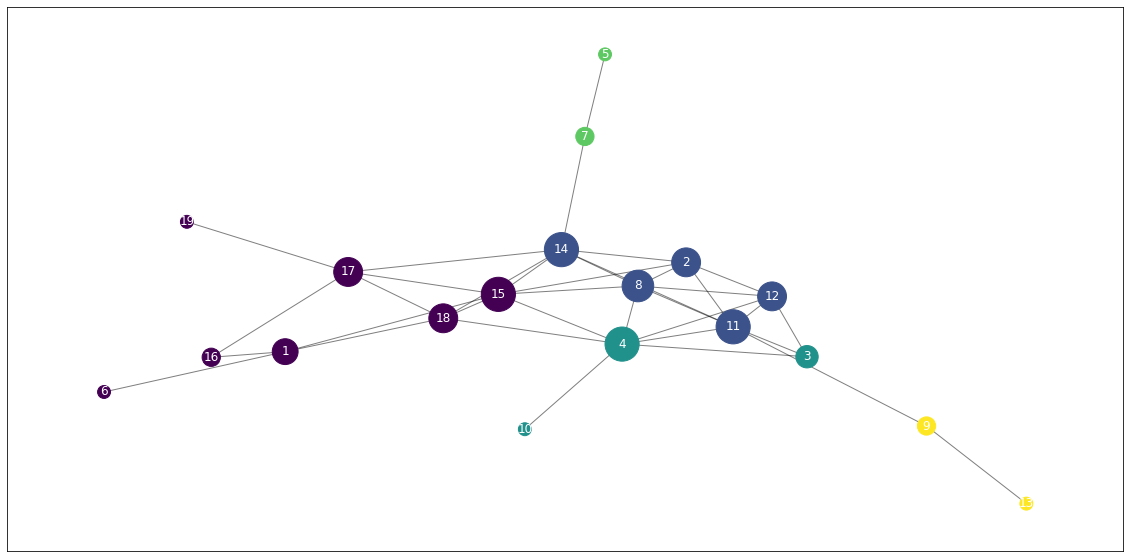

<Figure size 432x288 with 0 Axes>

In [132]:
fig = plt.figure(figsize = (20,10))
pos = nx.spring_layout(G)

cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G,pos, node_size = sizes, node_color = color_list_community, cmap = cmap)
nx.draw_networkx_edges(G, pos, alpha = 0.5)
nx.draw_networkx_labels(G, pos, font_size = 12, font_color = 'white')
plt.show()
plt.savefig('/content/drive/MyDrive/NbS/topic_clustering_result.png')

# Step3-5. Hot/Cold 분석  
해당 분석은 통계적 분석으로 R프로그래밍 언어를 통해 분석 진행  
